# Exploratory Data Analysis Exercise with Pandas and Matplotlib

In this exercise, you are responsible for devleoping a data pipeline to ingest and analyze multi-state streamflow records from CSV files in our Canvas Class. This exercise will directly assist with HW #1. Filepath for the data:

    files -> Data -> NWIS_Streaflow -> <STATE>

You will download the data from Canvas and load it into a folder you create called "streamflow_data". Once within the repo, you will load the data into this python notebook and perform exploratory data analysis. After performing data cleaning and time-series alignment with Pandas, you will transition develop Matplotlib visualizations. The core of the assignment emphasizes the Matplotlib philosophy, challenging you to use powerful operators to link, overlay, and explore discharge trends across Idaho, Utah, and Wyoming.

The [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) provides interactive mapping to locate sites and repective metadata.

## Task 1: Select, download, and bring the data into your notebook session

Use the [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) to locate one site below a reservoir,  one site in a headwater catchment, and one site near a rivers terminus to the Great Salt Lake. Using this siteid, find the site data in the Canvas NWIS_Streamflow data folder, download it to your computer, then upload it to this repo into a folder named "streamflow_data". In the code block below, load the data into a Pandas DataFrame and inspect it as we previously did in the Pandas exercises (.head(), .describe()). Write down what you notice. Remove any outliers NaN values, and -999.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [22]:
files = {
    #"WEBER RIVER AT I-84 AT UINTAH, UT (Flows into GSL)": "./Data/10136600_1980_2020.csv",
    "WEBER RIVER AT GATEWAY, UT (Flows into GSL)": "./Data/10136500_1980_2020.csv",
    "WEBER RIVER AT ECHO, UT (Below Res.)": "./Data/10132000_1980_2020.csv",
    "WEBER RIVER NEAR OAKLEY, UT (Catchment Basin)": "./Data/10128500_1980_2020.csv"
}

# Read CSVs into a dictionary of DataFrames
data = {label: pd.read_csv(path, parse_dates=['Datetime'], index_col='Datetime') 
        for label, path in files.items()}

# Quick check
for label, df in data.items():
    print(label, df.shape)
    print(df.head(1))
    print(" ")

WEBER RIVER AT GATEWAY, UT (Flows into GSL) (12642, 6)
            USGS_flow    variable   USGS_ID measurement_unit     qualifiers  \
Datetime                                                                      
1986-02-19  3794.1177  streamflow  10136500            ft3/s  ['A', '[91]']   

            series  
Datetime            
1986-02-19       0  
 
WEBER RIVER AT ECHO, UT (Below Res.) (10957, 6)
            USGS_flow    variable   USGS_ID measurement_unit     qualifiers  \
Datetime                                                                      
1990-10-01      174.0  streamflow  10132000            ft3/s  ['A', '[91]']   

            series  
Datetime            
1990-10-01       0  
 
WEBER RIVER NEAR OAKLEY, UT (Catchment Basin) (12417, 6)
             USGS_flow    variable   USGS_ID measurement_unit qualifiers  \
Datetime                                                                   
1986-10-02  123.111115  streamflow  10128500            ft3/s      ['A']   

     

## Task 2: Slicing and Dicing

We are interested in examining the data from 2000-2010. Slice the data accordingly and save it to a new Pandas DataFrame.

In [23]:
#Make new dataframe with data from 2000-2010
datasubset = {}
for label, df in data.items():
    datasubset[label] = df.loc['2000-01-01':'2010-12-31']

## Task 3: Create plots for each DataFrame using the df.plot() function

Use the built in functionality of Pandas to plot the time series of each stream.

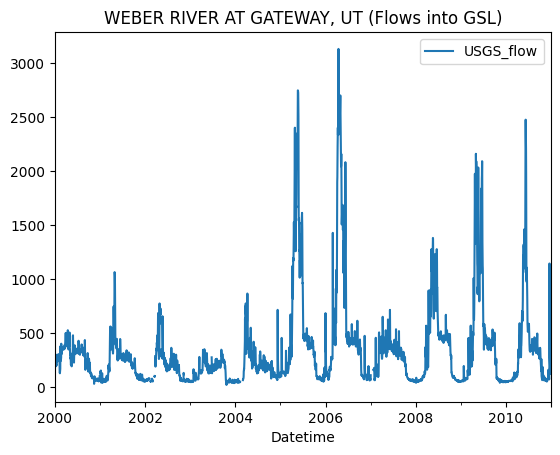

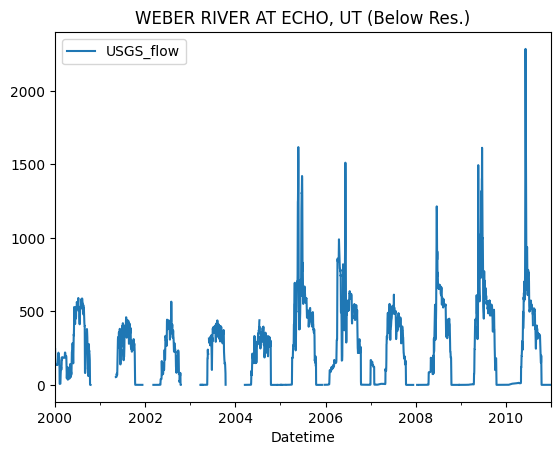

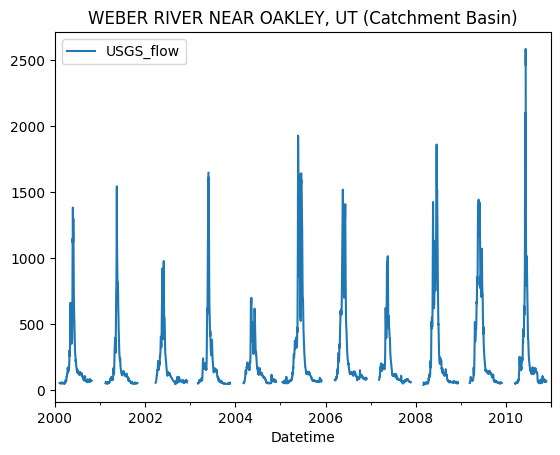

In [24]:
#plot the data with pandas
for label, df in datasubset.items():
    df.plot(y='USGS_flow', title=label)
    plt.show()

## Task 4: Join/Merge Pandas DataFrames

Create a single dataframe named All_Streams and combine all streamflow monitoring data into this dataframe. Hint, set your index to the date. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus). Print the dataframe.head() to demonstrate that is complete.

In [25]:
#Remove extra columns

def keep_flow_and_datetime(df):
    df = df.copy()
    if 'Datetime' not in df.columns:
        df = df.reset_index()
    flow = next((c for c in df.columns if c.lower() == 'usgs_flow' or 'flow' in c.lower()), None)
    if flow is None:
        raise KeyError(f'No flow column found; available: {df.columns.tolist()}')
    return df[['Datetime', flow]].rename(columns={flow: 'USGS_flow'}).set_index('Datetime')

datasubset = {label: keep_flow_and_datetime(df) for label, df in datasubset.items()}

for label, df in datasubset.items():
    print(label, df.shape)
    print(df.head(1))
    print(df[90:91])
    print()

WEBER RIVER AT GATEWAY, UT (Flows into GSL) (4018, 1)
            USGS_flow
Datetime             
2000-01-01  131.85417
            USGS_flow
Datetime             
2000-03-31  418.71875

WEBER RIVER AT ECHO, UT (Below Res.) (4018, 1)
            USGS_flow
Datetime             
2000-01-01   168.9375
            USGS_flow
Datetime             
2000-03-31  196.77083

WEBER RIVER NEAR OAKLEY, UT (Catchment Basin) (4018, 1)
            USGS_flow
Datetime             
2000-01-01        NaN
            USGS_flow
Datetime             
2000-03-31  62.666668



In [27]:
# Define column rename mapping
rename_map = {
    "WEBER RIVER AT GATEWAY, UT (Flows into GSL)": "CFS_Term",
    "WEBER RIVER AT ECHO, UT (Below Res.)": "CFS_BelowRes",
    "WEBER RIVER NEAR OAKLEY, UT (Catchment Basin)": "CFS_Head",
}

In [32]:
# Create All_Streams with Datetime and three CFS columns
cfs_data = {}
for label, df in datasubset.items():
    if label in rename_map:
        new_col_name = rename_map[label]
        cfs_data[new_col_name] = df['USGS_flow']

# Build DataFrame from the CFS series and reset index to make Datetime a column
All_Streams = pd.DataFrame(cfs_data).reset_index()
print(All_Streams[90:95])

     Datetime   CFS_Term  CFS_BelowRes   CFS_Head
90 2000-03-31  418.71875     196.77083  62.666668
91 2000-04-01  401.38540     197.03125  63.595238
92 2000-04-02  405.14584     197.04167  66.915665
93 2000-04-03  418.47916     190.20833  70.869050
94 2000-04-04  437.31250     156.82292  80.190475


## Task 5: Demonstrate your Prowess with Matplotlib

Create a Four separate figures with all three stream on them:

* Figure 1 should be a single plot with all three stream  monitoring locations
* Figure 2 should be a single figure with subplots for each stream monitoring location. The subplots should be 2 rows and 2 columns
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 3 rows and 1 column 
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 1 row and 3 columns

Make sure your plots have the correct axes, labeled axes, a title, a legend. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus).

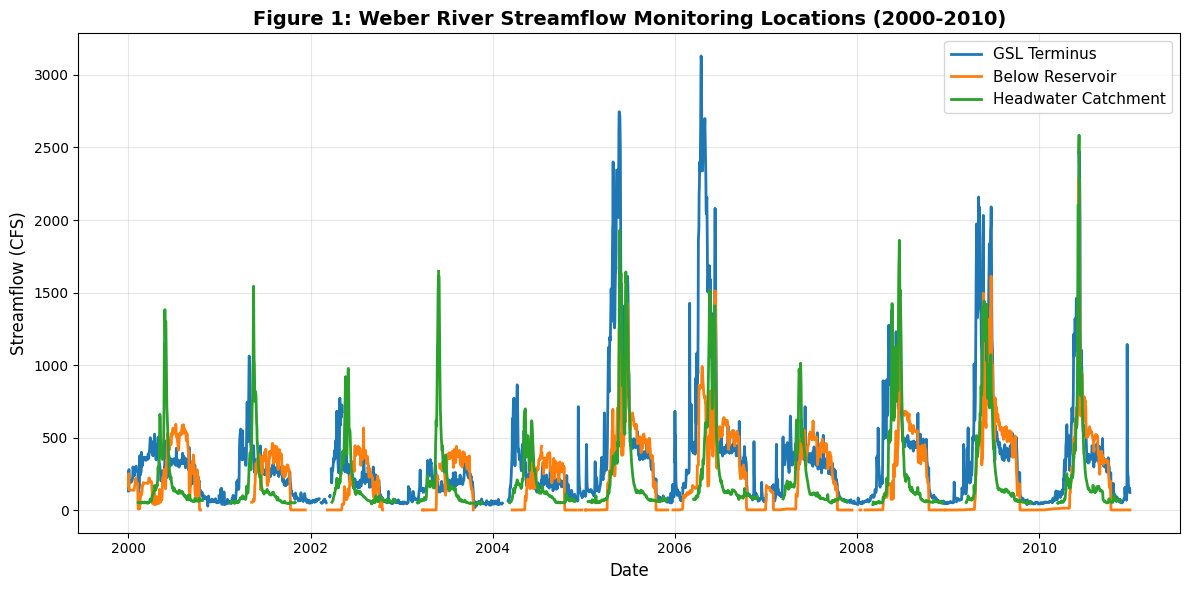

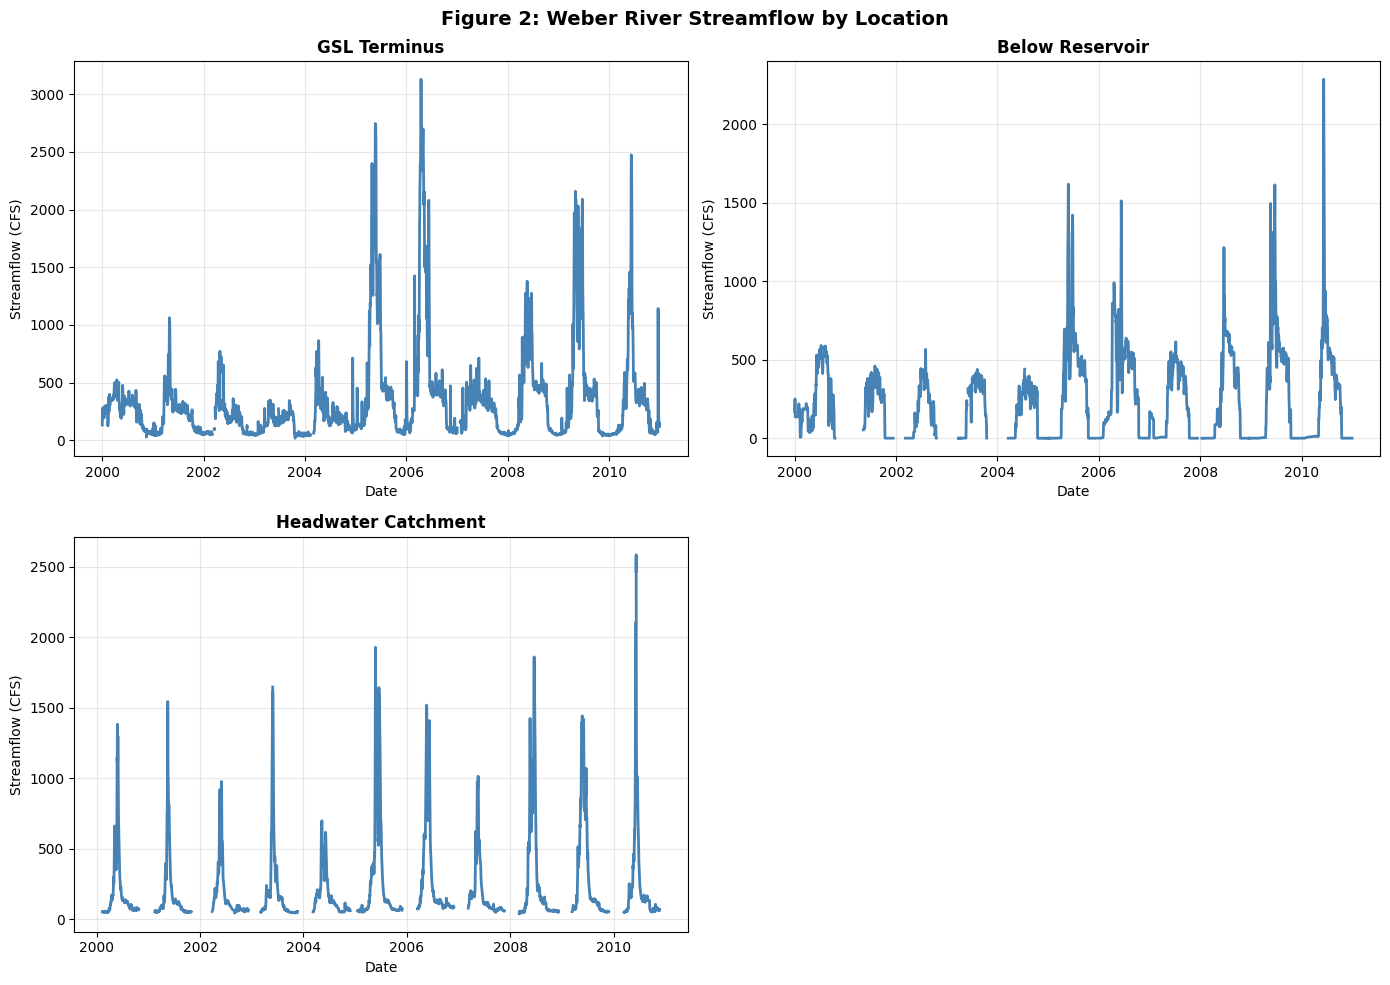

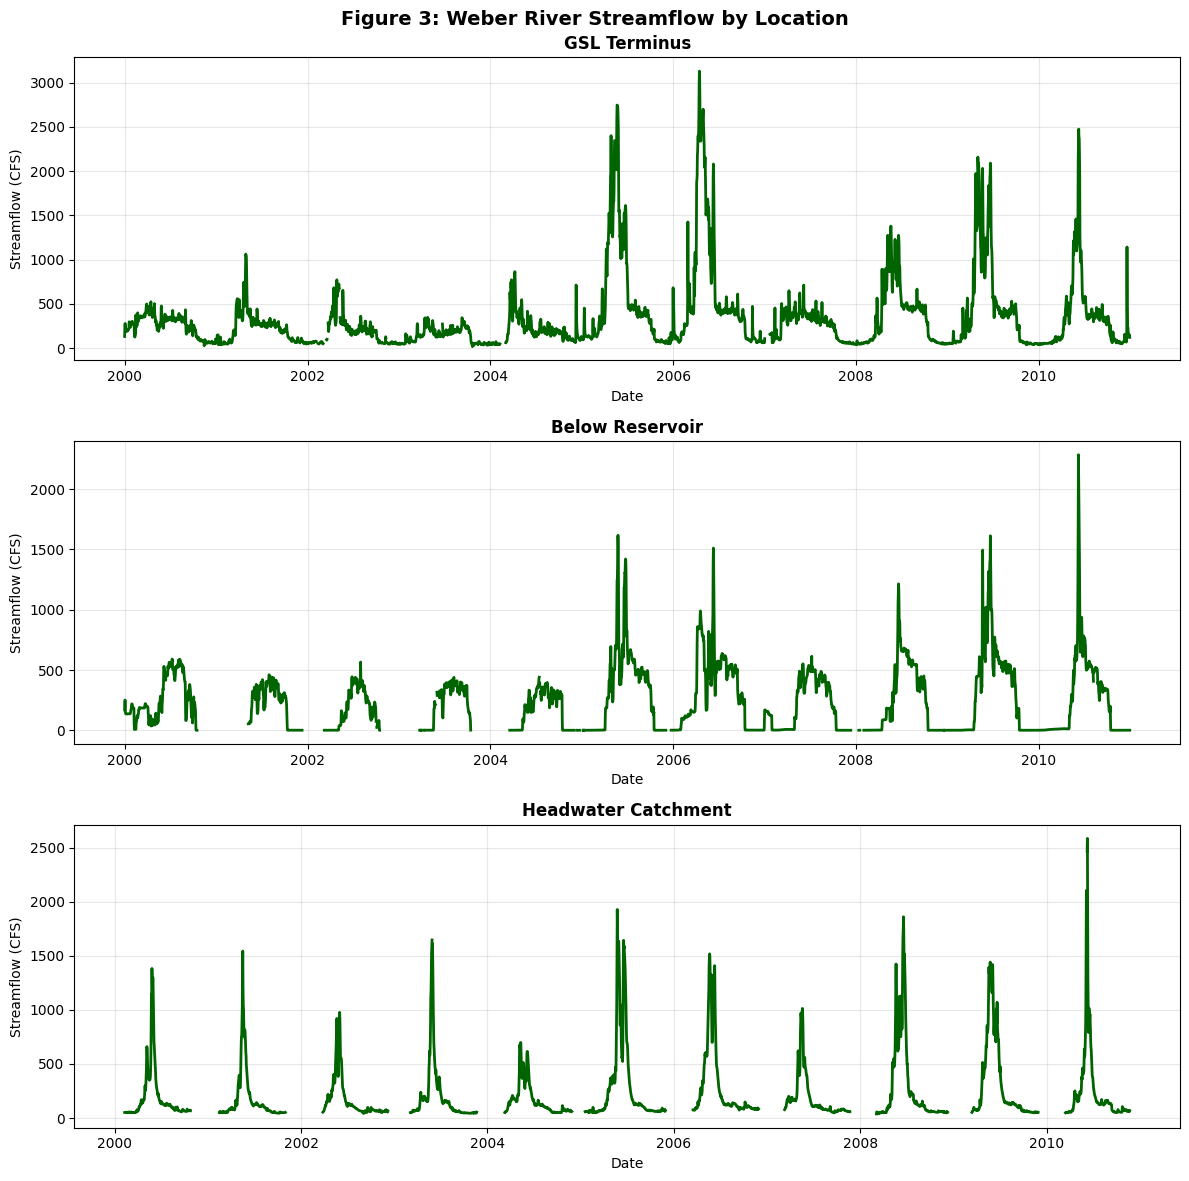

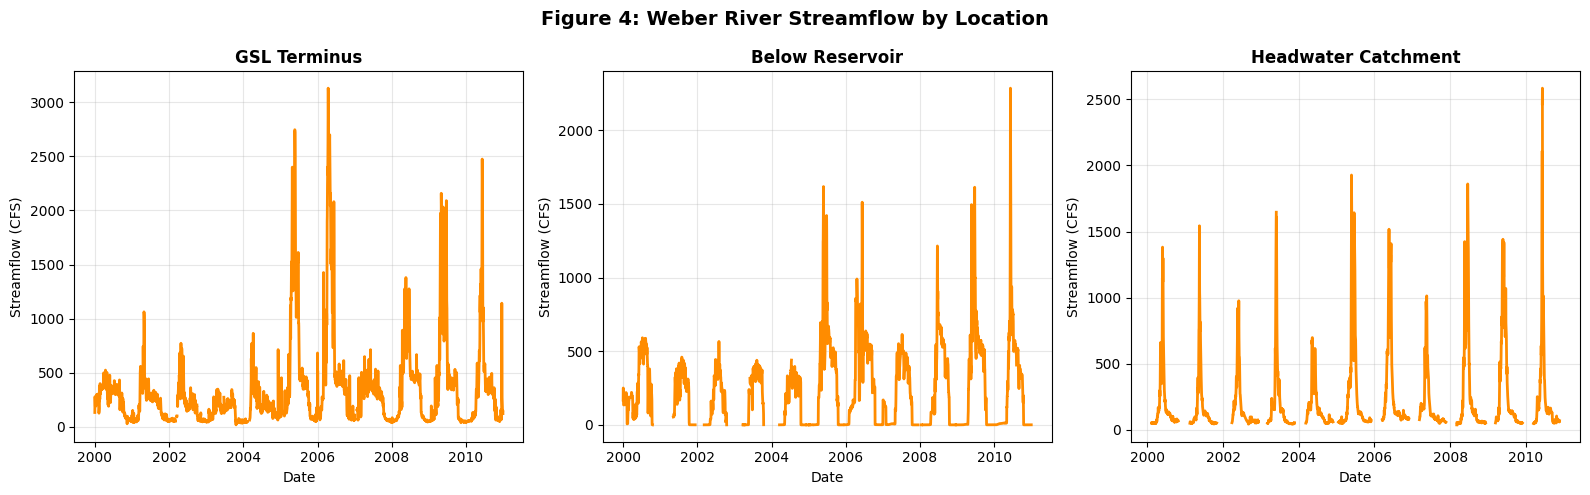

In [35]:
# Define descriptive labels for each stream location
stream_labels = {
    'CFS_Term': 'GSL Terminus',
    'CFS_BelowRes': 'Below Reservoir',
    'CFS_Head': 'Headwater Catchment'
}

# Figure 1: Single plot with all three streams
fig1, ax1 = plt.subplots(figsize=(12, 6))
for col in ['CFS_Term', 'CFS_BelowRes', 'CFS_Head']:
    ax1.plot(All_Streams['Datetime'], All_Streams[col], label=stream_labels[col], linewidth=2)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Streamflow (CFS)', fontsize=12)
ax1.set_title('Figure 1: Weber River Streamflow Monitoring Locations (2000-2010)', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=11)
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Figure 2: 2 rows x 2 columns subplots
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
streams = ['CFS_Term', 'CFS_BelowRes', 'CFS_Head']
positions = [(0, 0), (0, 1), (1, 0)]

for i, (stream, pos) in enumerate(zip(streams, positions)):
    ax = axes2[pos]
    ax.plot(All_Streams['Datetime'], All_Streams[stream], color='steelblue', linewidth=2)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Streamflow (CFS)', fontsize=10)
    ax.set_title(stream_labels[stream], fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Hide the empty subplot (1, 1)
axes2[1, 1].set_visible(False)
fig2.suptitle('Figure 2: Weber River Streamflow by Location', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Figure 3: 3 rows x 1 column subplots
fig3, axes3 = plt.subplots(3, 1, figsize=(12, 12))
streams = ['CFS_Term', 'CFS_BelowRes', 'CFS_Head']

for i, (stream, ax) in enumerate(zip(streams, axes3)):
    ax.plot(All_Streams['Datetime'], All_Streams[stream], color='darkgreen', linewidth=2)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Streamflow (CFS)', fontsize=10)
    ax.set_title(stream_labels[stream], fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

fig3.suptitle('Figure 3: Weber River Streamflow by Location', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Figure 4: 1 row x 3 columns subplots
fig4, axes4 = plt.subplots(1, 3, figsize=(16, 5))
streams = ['CFS_Term', 'CFS_BelowRes', 'CFS_Head']

for stream, ax in zip(streams, axes4):
    ax.plot(All_Streams['Datetime'], All_Streams[stream], color='darkorange', linewidth=2)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Streamflow (CFS)', fontsize=10)
    ax.set_title(stream_labels[stream], fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

fig4.suptitle('Figure 4: Weber River Streamflow by Location', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
